In [9]:
import io
import os
import glob
import requests
import pandas as pd
import seaborn as sns

# Análise da exportação brasileira de vinhos de mesa

## Períodos de interesse

In [2]:
ano_inicial = 2009
ano_final = 2023

## Obtendo os dados de exportação de vinhos

## Carregando os dados de exportação de vinhos em um dataframe

In [3]:
# Obtendo a lista de arquivos que será carregada no dataframe
arqs_csv = glob.glob(os.path.join('dados', 'exp-vinho-*.csv'))

# Definindo o dataframe que irá receber os dados de todos os arquivos CSV
'''Concatenação dos dataframes obtidos à partir da lista de arquivos (list
   comprehension abaixo), ignorando a primeira linha dos CSVs e definindo o
   nome das colunas manualmente'''
exportacao = pd.concat([pd.read_csv(arq,
                                    skiprows=1,
                                    na_values=0,
                                    names=['pais',
                                           'qtd_litros',
                                           'vlr_usd',
                                           'ano']) for arq in arqs_csv],
                       ignore_index=True)

exportacao.head()

,pais,qtd_litros,vlr_usd,ano
0,Afeganistão,NaN,NaN,2021
1,África do Sul,NaN,NaN,2021
2,"Alemanha, República Democrática",225086.0,393482.0,2021
3,Angola,54786.0,84235.0,2021
4,Anguilla,NaN,NaN,2021


## Analisando a exportação total por país

In [4]:
total_por_pais = exportacao.fillna(0)\
                           .groupby('pais')[['qtd_litros', 'vlr_usd']]\
                           .sum()\
                           .copy()

total_por_pais.head()

,qtd_litros,vlr_usd
pais,,
Afeganistão,0.0,0.0
"Alemanha, República Democrática",3376290.0,5902230.0
Angola,821790.0,1263525.0
Anguilla,0.0,0.0
Antilhas Holandesas,123525.0,159765.0


In [5]:
# Países sem exportação
paises_sem_exportacao = total_por_pais.query('qtd_litros == 0 & vlr_usd == 0')


'''Obtendo a lista de paises com exportação à partir dos conjutos de índices
   dos dois dataframes - total_por_pais e paises_sem_exportacao'''

conj_paises = set(total_por_pais.index.tolist())
conj_paises_sem_exportacao = set(paises_sem_exportacao.index.tolist())

conj_paises_com_exportacao = conj_paises - conj_paises_sem_exportacao


# Países com exportação
paises_com_exportacao = total_por_pais.loc[list(conj_paises_com_exportacao)]

print(f'''
Período de análise............: {ano_inicial} - {ano_final}
Total de países...............: {len(conj_paises)} países
Total de países com exportação: {len(conj_paises_com_exportacao)} países
''')


Período de análise............: 2009 - 2023
Total de países...............: 137 países
Total de países com exportação: 39 países



## Países com maior volume total de exportações

<Axes: xlabel='pais', ylabel='qtd_litros'>

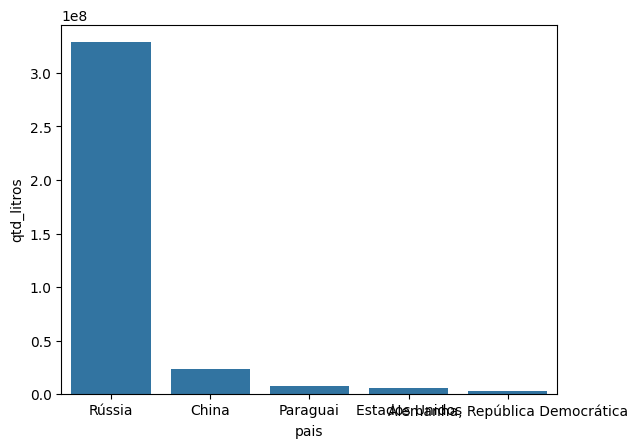

In [13]:
sns.barplot(paises_com_exportacao.sort_values('qtd_litros', ascending=False).head(), x='pais', y='qtd_litros')